<a href="https://colab.research.google.com/github/tianhanl0/38610/blob/main/Requesting_data_from_public_APIs_Advice_Slip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# [Advice Slip JSON API](https://api.adviceslip.com/)
It currently gives out over 10 million pieces of advice every year.

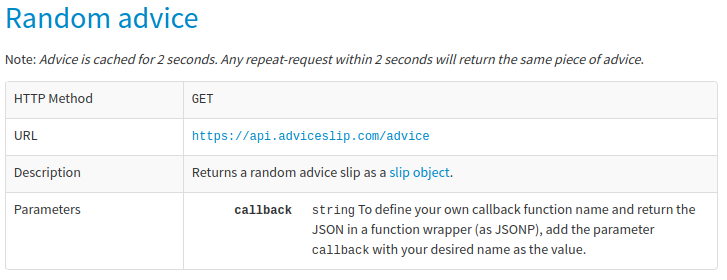

In [2]:
import requests
import json

#define URL
URL = f'https://api.adviceslip.com/advice'

#get response from service
#the response has all information about your request: failed, success and other
response = requests.get(URL)

## Responses
The client accepts the Request, being processed successfully at the server.

* 200 - OK
* 201 - Created
* 202 - Accepted
* 203 - Non-Authoritative Information
* 204 - No Content
* 205 - Reset Content
* 206 - Partial Content
* 207 - Multi-Status
* 208 - Already Reported
* 226 - IM Used

There are also other codes. For a full list click [here](https://restfulapi.net/http-status-codes/).

In [3]:
#the response has a field with the status code
response.status_code

200

## Response content


In [4]:
response.content

b'{"slip": { "id": 35, "advice": "Only those who attempt the impossible can achieve the absurd."}}'

In [5]:
response.url

'https://api.adviceslip.com/advice'

In [6]:
#in general, we care about the json response because it is easier to parse
response.json()

{'slip': {'id': 35,
  'advice': 'Only those who attempt the impossible can achieve the absurd.'}}

## User story
A developer wants to develop a dashboard that will get updated every morning at 6:00a.m. As part of this dashboard, the developers would like to add daily quote.

<a href="https://www.dynamicpoint.com/businessoneportal/dashboard-mockup/"><img src="https://www.dynamicpoint.com/wp-content/uploads/2019/09/dashboard-mockup.png" width="100%" /></a>

The developers would like to create function that will return the quote as a string that can be added to this block in the dashboard. 



In [7]:
def get_daily_quote():
  '''
  Return API response.
  '''

  #define URL
  URL = f'https://api.adviceslip.com/advice'
  response = requests.get(URL)
  return response

get_daily_quote()

<Response [200]>

However, I would like 

In [8]:
def get_daily_quote():
  '''
  Return API response as JSON.
  '''

  #define URL
  URL = f'https://api.adviceslip.com/advice'
  response = requests.get(URL)
  return response.json()

get_daily_quote()

{'slip': {'id': 104, 'advice': 'Do, or do not. There is no try.'}}

In reality, we are only interested in the daily quote, so we can extract the key `advice` from the JSON response.

In [9]:
def get_daily_quote():
  '''
  Return daily quote.
  '''

  #define URL
  URL = f'https://api.adviceslip.com/advice'
  response = requests.get(URL)
  json = response.json()
  return json['slip']['advice']

get_daily_quote()

'Never set an alarm clock unless you know how to switch it off'

## "Gentlemen, we can rebuild him. We have the technology."

<img src="https://media4.giphy.com/media/xUNd9ZNRpDBcCHtoWc/giphy.gif?cid=ecf05e47d0v1pyi3tb5u0a0k10l1n035h4szbydh6xgptb3d&rid=giphy.gif&ct=g" width="50%" />

Refactor the method above and verify the response code.

* If the response code is `200`, then return the quote/advice.
* If the response code is not `200`, then return `None` and issue a warning stating `Unable to retrieve advice`.

In [30]:
from warnings import warn as warning
def get_specific_quote():
  '''
  Get specific quote.
  '''

  #define URL
  URL = f'https://api.adviceslip.com/advice' #fstrings are now useful!
  response = requests.get(URL)

  if response.status_code == 200:
    json = response.json()
    return json['slip']['advice']
  else:
    warning('Unable to retrieve advice')
    return None

get_specific_quote()

"What's stopping you?"

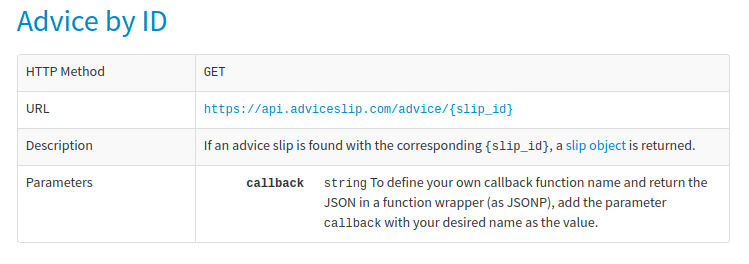

In [32]:
def get_specific_quote( slip_id=100 ):
  '''
  Get specific quote.
  '''

  #define URL
  URL = f'https://api.adviceslip.com/advice/{slip_id}' #fstrings are now useful!
  response = requests.get(URL)

  if response.status_code == 200:
    json = response.json()
    try:
      return json['slip']['advice']
    except:
      return None
  else:
    return None

get_specific_quote(1)

'Remember that spiders are more afraid of you, than you are of them.'

In [33]:
from tabulate import tabulate
from tqdm import tqdm #use this package to display a progress bar

quotes = []
for slip_id in tqdm(range(1,26,1)):
  quote = get_specific_quote(slip_id)
  if quote is not None:
    quotes.append([quote])

print(tabulate(quotes))

100%|██████████| 25/25 [00:01<00:00, 17.62it/s]

---------------------------------------------------------------------------------------------------------------
Remember that spiders are more afraid of you, than you are of them.
Smile and the world smiles with you. Frown and you're on your own.
Don't eat non-snow-coloured snow.
Cars are bad investments.
If you have the chance, take it!
Never cut your own fringe.
Make choices and dont look back.
Happiness is a journey, not a destination.
True happiness always resides in the quest.
Never pay full price for a sofa at DFS.
Avoid mixing Ginger Nuts with other biscuits, they contaminate. Keep separated.
Always block trolls.
If you're feeling tired or anxious, a pint of water will almost always make you feel better.
Life is better when you sing about bananas.
If it ain't broke don't fix it.
It's unlucky to be superstitious.
Sometimes it's best to ignore other people's advice.
Don't judge a book by its cover, unless it has a synopsis on the back.
If you cannot unscrew the lid of a jar, try p

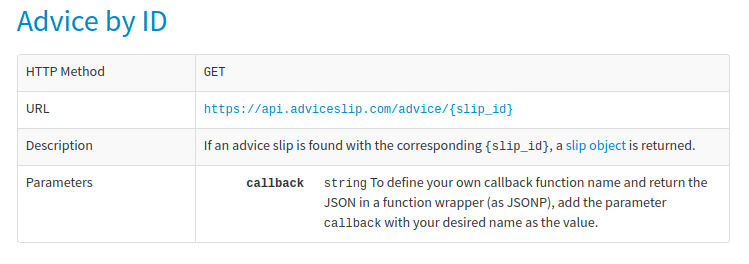

Implement a method that retrieves searching advice.

If not results is found, then return an empty dictionary.

In [55]:
def get_specific_query( query = '' ):
  '''
  Get specific quote.
  '''

  #define URL
  URL = f'https://api.adviceslip.com/advice/search/{query}' #fstrings are now useful!
  response = requests.get(URL)

  if response.status_code == 200:
    return response.json()
  else:
    return None

get_specific_query('comida')

{'message': {'type': 'notice',
  'text': 'No advice slips found matching that search term.'}}